# Bayes on Dataset reduced by correlation

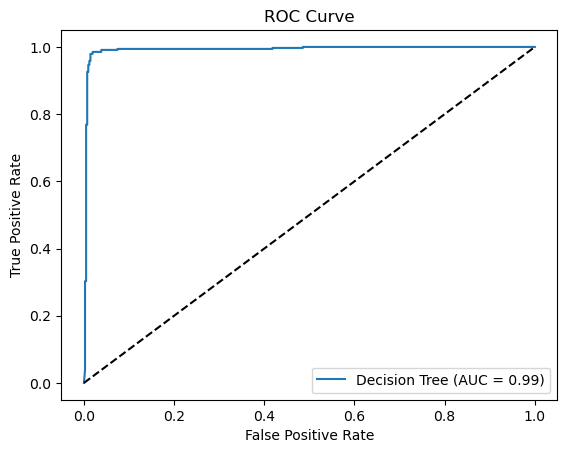

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

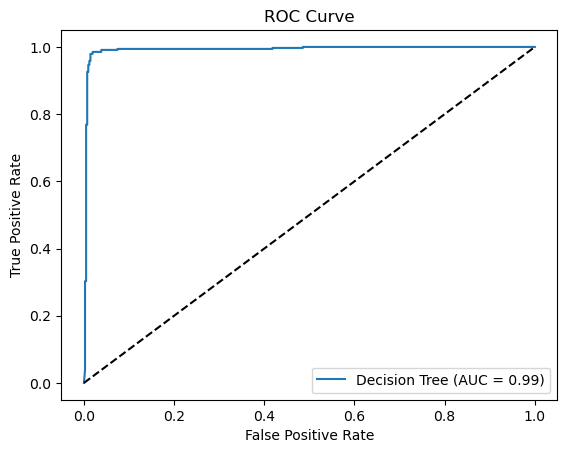

In [2]:


train = pd.read_csv('./Dataset/Train.csv', index_col=0)
test = pd.read_csv('./Dataset/Test.csv', index_col=0)

y_train = train['Class']
X_train = train.drop('Class',axis=1)
y_test = test['Class']
X_test = test.drop('Class',axis=1)

clf = GaussianNB()
clf.fit(X_train, y_train)

# Calcola le probabilità di predizione del modello dell'albero decisionale utilizzando predict_proba
y_pred_prob = clf.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob)
auc_dt = roc_auc_score(y_test, y_pred_prob)

# Plotta la curva ROC dei due modelli per comparare le performance
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

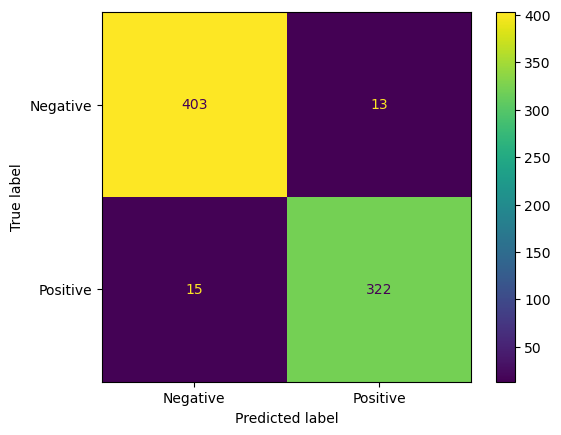

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()

In [5]:
from sklearn.metrics import classification_report


print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       418
           1       0.96      0.96      0.96       335

    accuracy                           0.96       753
   macro avg       0.96      0.96      0.96       753
weighted avg       0.96      0.96      0.96       753



## Studio robustezza

In [3]:
# Import del dataset già suddiviso in train e test
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dataset = pd.read_csv('./Dataset/Brain Tumor.csv', index_col=0)

dataset = dataset[['Mean', 'Entropy', 'Skewness', 'Contrast', 'Correlation', 'Class']]

y = dataset['Class']
df = dataset.drop("Class", axis=1)

n_fold = 10
folds = StratifiedKFold(n_splits=n_fold, shuffle=True)

In [4]:
accuracy_stratified = []
precision_stratified = []
recall_stratified = []
f1_stratified = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df, y)):
        X_train, X_valid = df.iloc[train_idx], df.iloc[valid_idx]
        y_train, y_valid = y[train_idx], y[valid_idx]

        clf = GaussianNB()
        clf.fit(X_train, y_train)
        y_pred_valid = clf.predict(X_valid)
        accuracy_stratified.append(accuracy_score(y_valid,y_pred_valid))
        precision_stratified.append(precision_score(y_valid,y_pred_valid))
        recall_stratified.append(recall_score(y_valid,y_pred_valid))
        f1_stratified.append(f1_score(y_valid,y_pred_valid))



In [5]:
import scipy.stats as st
import matplotlib.pyplot as plt

mean_accuracy = np.mean(accuracy_stratified)
mean_precision = np.mean(precision_stratified)
mean_recall = np.mean(recall_stratified)
mean_f1 = np.mean(f1_stratified)

accuracy_confidence_interval = st.t.interval(confidence=0.90, df=len(accuracy_stratified)-1, loc=mean_accuracy, scale=st.sem(accuracy_stratified))
precision_confidence_interval = st.t.interval(confidence=0.90, df=len(precision_stratified)-1, loc=mean_precision, scale=st.sem(precision_stratified))
recall_confidence_interval = st.t.interval(confidence=0.90, df=len(recall_stratified)-1, loc=mean_recall, scale=st.sem(recall_stratified))
f1_confidence_interval = st.t.interval(confidence=0.90, df=len(f1_stratified)-1, loc=mean_f1, scale=st.sem(f1_stratified))



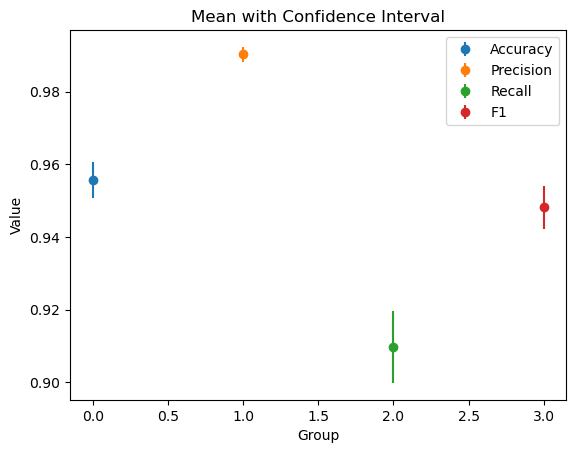

In [6]:
# Plot the mean and confidence interval
plt.errorbar(0, mean_accuracy, yerr=(accuracy_confidence_interval[1] - accuracy_confidence_interval[0])/2, fmt='o', label='Accuracy')
plt.errorbar(1, mean_precision, yerr=(precision_confidence_interval[1] - precision_confidence_interval[0])/2, fmt='o', label='Precision')
plt.errorbar(2, mean_recall, yerr=(recall_confidence_interval[1] - recall_confidence_interval[0])/2, fmt='o', label='Recall')
plt.errorbar(3, mean_f1, yerr=(f1_confidence_interval[1] - f1_confidence_interval[0])/2, fmt='o', label='F1')

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Mean with Confidence Interval')

# Show the plot
plt.legend()
plt.show()

# Bayes on Dataset reduced by PCA

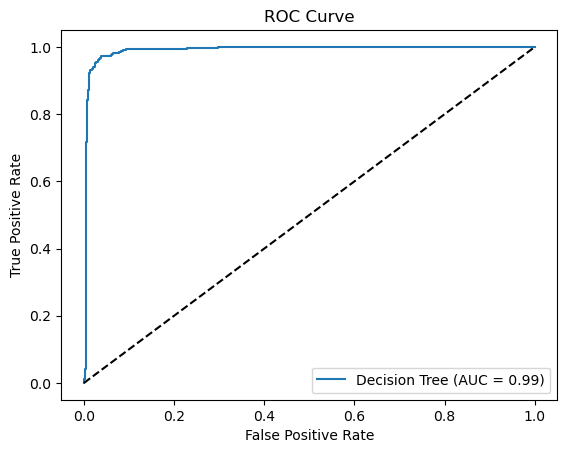

In [6]:
train = pd.read_csv('./Dataset/PCA/Train.csv', index_col=0)
test = pd.read_csv('./Dataset/PCA/Test.csv', index_col=0)

y_train = train['Class']
X_train = train.drop('Class',axis=1)
y_test = test['Class']
X_test = test.drop('Class',axis=1)

clf = GaussianNB()
clf.fit(X_train, y_train)

# Calcola le probabilità di predizione del modello dell'albero decisionale utilizzando predict_proba
y_pred_prob = clf.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob)
auc_dt = roc_auc_score(y_test, y_pred_prob)

# Plotta la curva ROC dei due modelli per comparare le performance
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

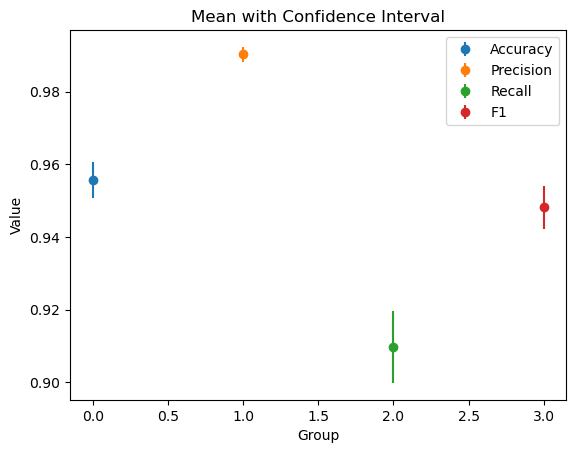

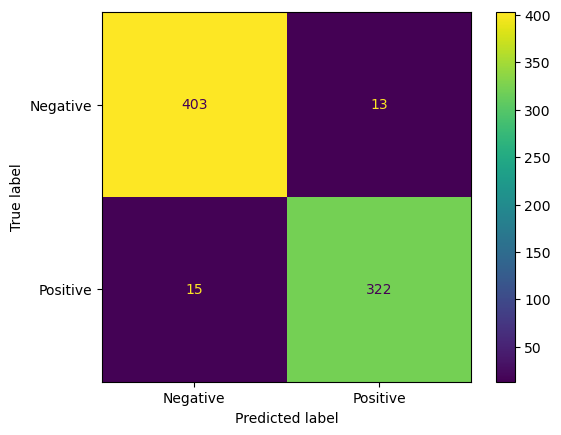

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()

In [8]:
from sklearn.metrics import classification_report


print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       418
           1       0.96      0.96      0.96       335

    accuracy                           0.96       753
   macro avg       0.96      0.96      0.96       753
weighted avg       0.96      0.96      0.96       753



## Studio robustezza

In [10]:
# Import del dataset già suddiviso in train e test
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dataset = pd.read_csv('./Dataset/PCA/dataset.csv', index_col=0)

y = dataset['Class']
df = dataset.drop("Class", axis=1)

n_fold = 10
folds = StratifiedKFold(n_splits=n_fold, shuffle=True)

In [11]:
accuracy_stratified = []
precision_stratified = []
recall_stratified = []
f1_stratified = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df, y)):
        X_train, X_valid = df.iloc[train_idx], df.iloc[valid_idx]
        y_train, y_valid = y[train_idx], y[valid_idx]

        clf = GaussianNB()
        clf.fit(X_train, y_train)
        y_pred_valid = clf.predict(X_valid)
        accuracy_stratified.append(accuracy_score(y_valid,y_pred_valid))
        precision_stratified.append(precision_score(y_valid,y_pred_valid))
        recall_stratified.append(recall_score(y_valid,y_pred_valid))
        f1_stratified.append(f1_score(y_valid,y_pred_valid))



In [12]:
import scipy.stats as st
import matplotlib.pyplot as plt

mean_accuracy = np.mean(accuracy_stratified)
mean_precision = np.mean(precision_stratified)
mean_recall = np.mean(recall_stratified)
mean_f1 = np.mean(f1_stratified)

accuracy_confidence_interval = st.t.interval(confidence=0.90, df=len(accuracy_stratified)-1, loc=mean_accuracy, scale=st.sem(accuracy_stratified))
precision_confidence_interval = st.t.interval(confidence=0.90, df=len(precision_stratified)-1, loc=mean_precision, scale=st.sem(precision_stratified))
recall_confidence_interval = st.t.interval(confidence=0.90, df=len(recall_stratified)-1, loc=mean_recall, scale=st.sem(recall_stratified))
f1_confidence_interval = st.t.interval(confidence=0.90, df=len(f1_stratified)-1, loc=mean_f1, scale=st.sem(f1_stratified))



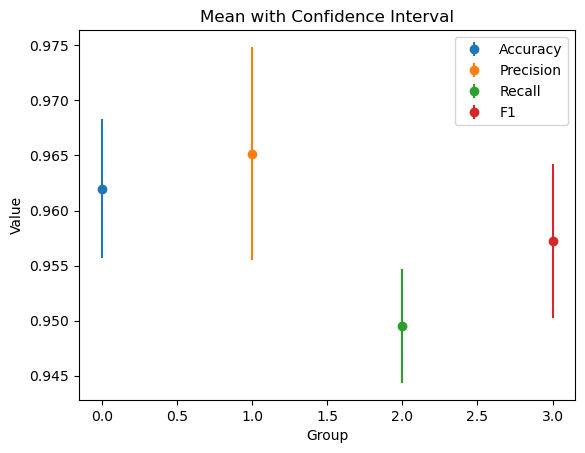

In [13]:
# Plot the mean and confidence interval
plt.errorbar(0, mean_accuracy, yerr=(accuracy_confidence_interval[1] - accuracy_confidence_interval[0])/2, fmt='o', label='Accuracy')
plt.errorbar(1, mean_precision, yerr=(precision_confidence_interval[1] - precision_confidence_interval[0])/2, fmt='o', label='Precision')
plt.errorbar(2, mean_recall, yerr=(recall_confidence_interval[1] - recall_confidence_interval[0])/2, fmt='o', label='Recall')
plt.errorbar(3, mean_f1, yerr=(f1_confidence_interval[1] - f1_confidence_interval[0])/2, fmt='o', label='F1')

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Mean with Confidence Interval')

# Show the plot
plt.legend()
plt.show()